In [22]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
gdf = gpd.read_file('MODIS_C6_1_USA_contiguous_and_Hawaii_7d/MODIS_C6_1_USA_contiguous_and_Hawaii_7d.shp')

In [25]:
gdf

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,19.39970,-92.04041,314.47,2.37,1.49,2025-10-28,0238,T,85,6.1NRT,294.59,34.07,N,POINT (-92.04041 19.3997)
1,19.39804,-92.05591,307.57,2.38,1.49,2025-10-28,0238,T,55,6.1NRT,294.39,15.52,N,POINT (-92.05591 19.39804)
2,19.39569,-92.06206,306.61,2.38,1.49,2025-10-28,0238,T,47,6.1NRT,294.46,14.12,N,POINT (-92.06206 19.39569)
3,29.28166,-82.17141,311.37,1.61,1.25,2025-10-28,0241,T,82,6.1NRT,290.16,22.31,N,POINT (-82.17141 29.28166)
4,29.28000,-82.18759,332.04,1.60,1.25,2025-10-28,0241,T,100,6.1NRT,290.73,64.57,N,POINT (-82.18759 29.28)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,43.06937,-123.80489,325.65,1.24,1.11,2025-11-04,1738,T,79,6.1NRT,277.16,35.91,D,POINT (-123.80489 43.06937)
2418,43.06783,-123.79074,361.65,1.24,1.11,2025-11-04,1738,T,100,6.1NRT,278.33,128.29,D,POINT (-123.79074 43.06783)
2419,43.05814,-123.79288,310.94,1.24,1.11,2025-11-04,1738,T,45,6.1NRT,276.27,18.69,D,POINT (-123.79288 43.05814)
2420,19.40579,-155.29463,319.39,1.54,1.22,2025-11-04,1923,T,71,6.1NRT,275.66,30.34,D,POINT (-155.29463 19.40579)


In [26]:
df = gdf.drop(columns='geometry')

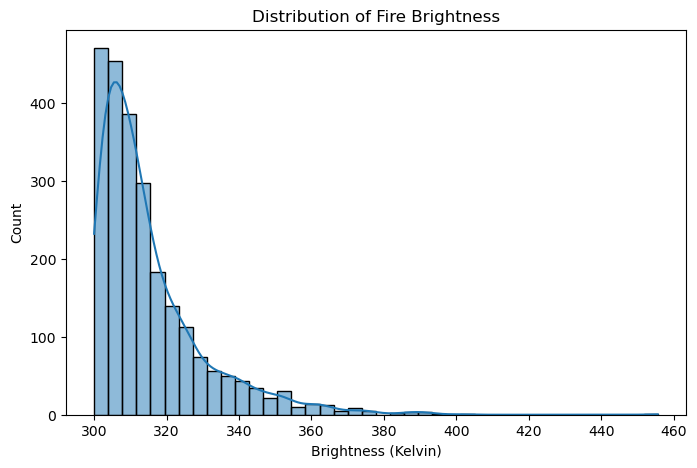

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['BRIGHTNESS'], bins=40, kde=True)
plt.title('Distribution of Fire Brightness')
plt.xlabel('Brightness (Kelvin)')
plt.ylabel('Count')
plt.show()

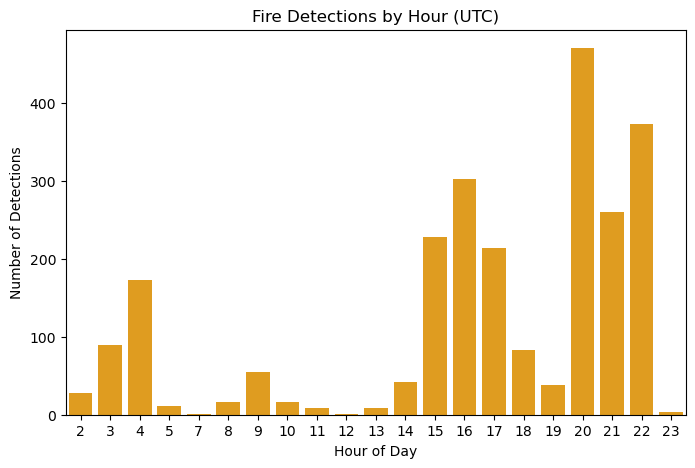

In [28]:
df['HOUR'] = df['ACQ_TIME'].astype(str).str.zfill(4).str[:2].astype(int)

plt.figure(figsize=(8,5))
sns.countplot(x='HOUR', data=df, color='orange')
plt.title('Fire Detections by Hour (UTC)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Detections')
plt.show()

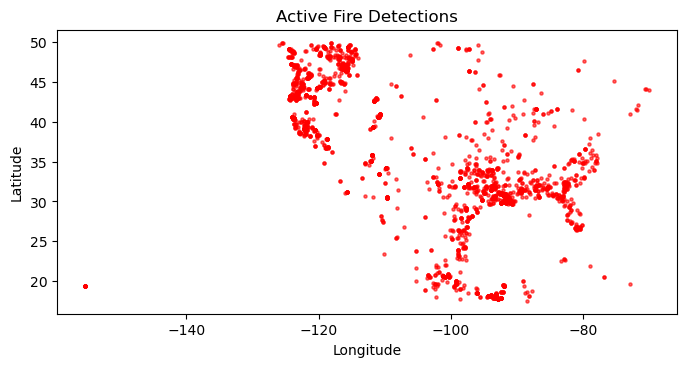

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)
ax.set_title('Active Fire Detections')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

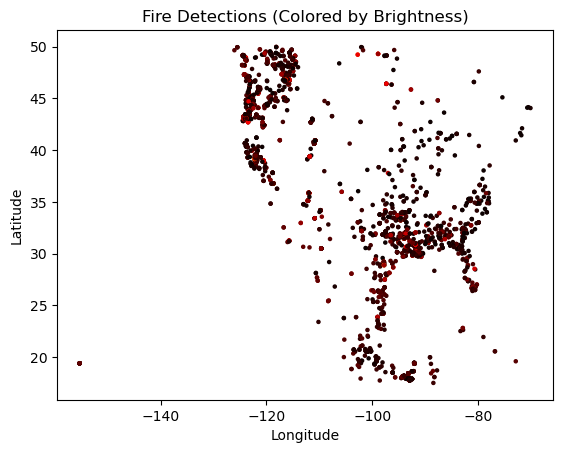

In [30]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], s=5, c=df['BRIGHTNESS'], cmap='hot')
plt.title('Fire Detections (Colored by Brightness)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

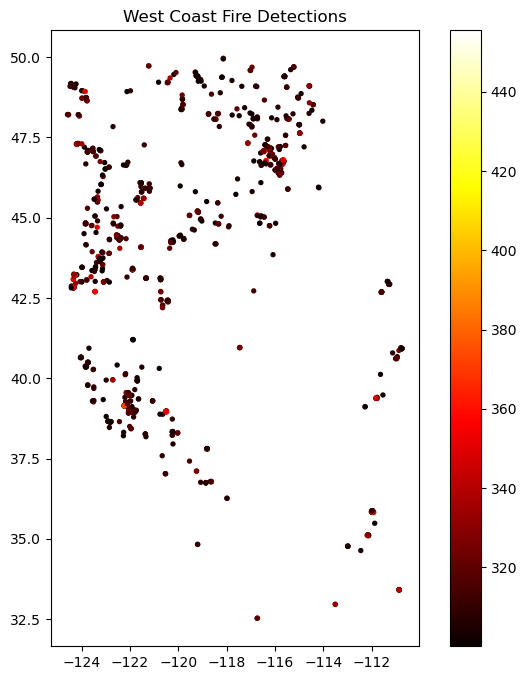

In [31]:
west_coast = gdf[
    (gdf['LONGITUDE'] < -110) & 
    (gdf['LONGITUDE'] > -125) &
    (gdf['LATITUDE'] > 32) &
    (gdf['LATITUDE'] < 50)
]

fig, ax = plt.subplots(figsize=(8,8))
west_coast.plot(ax=ax, column='BRIGHTNESS', cmap='hot', markersize=8, legend=True)
ax.set_title('West Coast Fire Detections')
plt.show()

In [34]:
import plotly.express as px

fig = px.scatter_geo(
    gdf,
    lat=gdf.geometry.y,
    lon=gdf.geometry.x,
    color="BRIGHTNESS",
    size="FRP",
    animation_frame="ACQ_DATE",
    hover_name="CONFIDENCE",
    projection="natural earth",
    color_continuous_scale="inferno",
    title="Fires Detected Over Time"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600)
fig.show()
